In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

# Display feature names and target names
print("Features:", iris.feature_names)
print("Target classes:", iris.target_names)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


In [3]:
# Split Dataset into Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
# Build and Train Decision Tree Model
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [5]:
# Make Predictions
y_pred = clf.predict(X_test)

In [6]:
# Evaluate Model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy Score: 0.9777777777777777


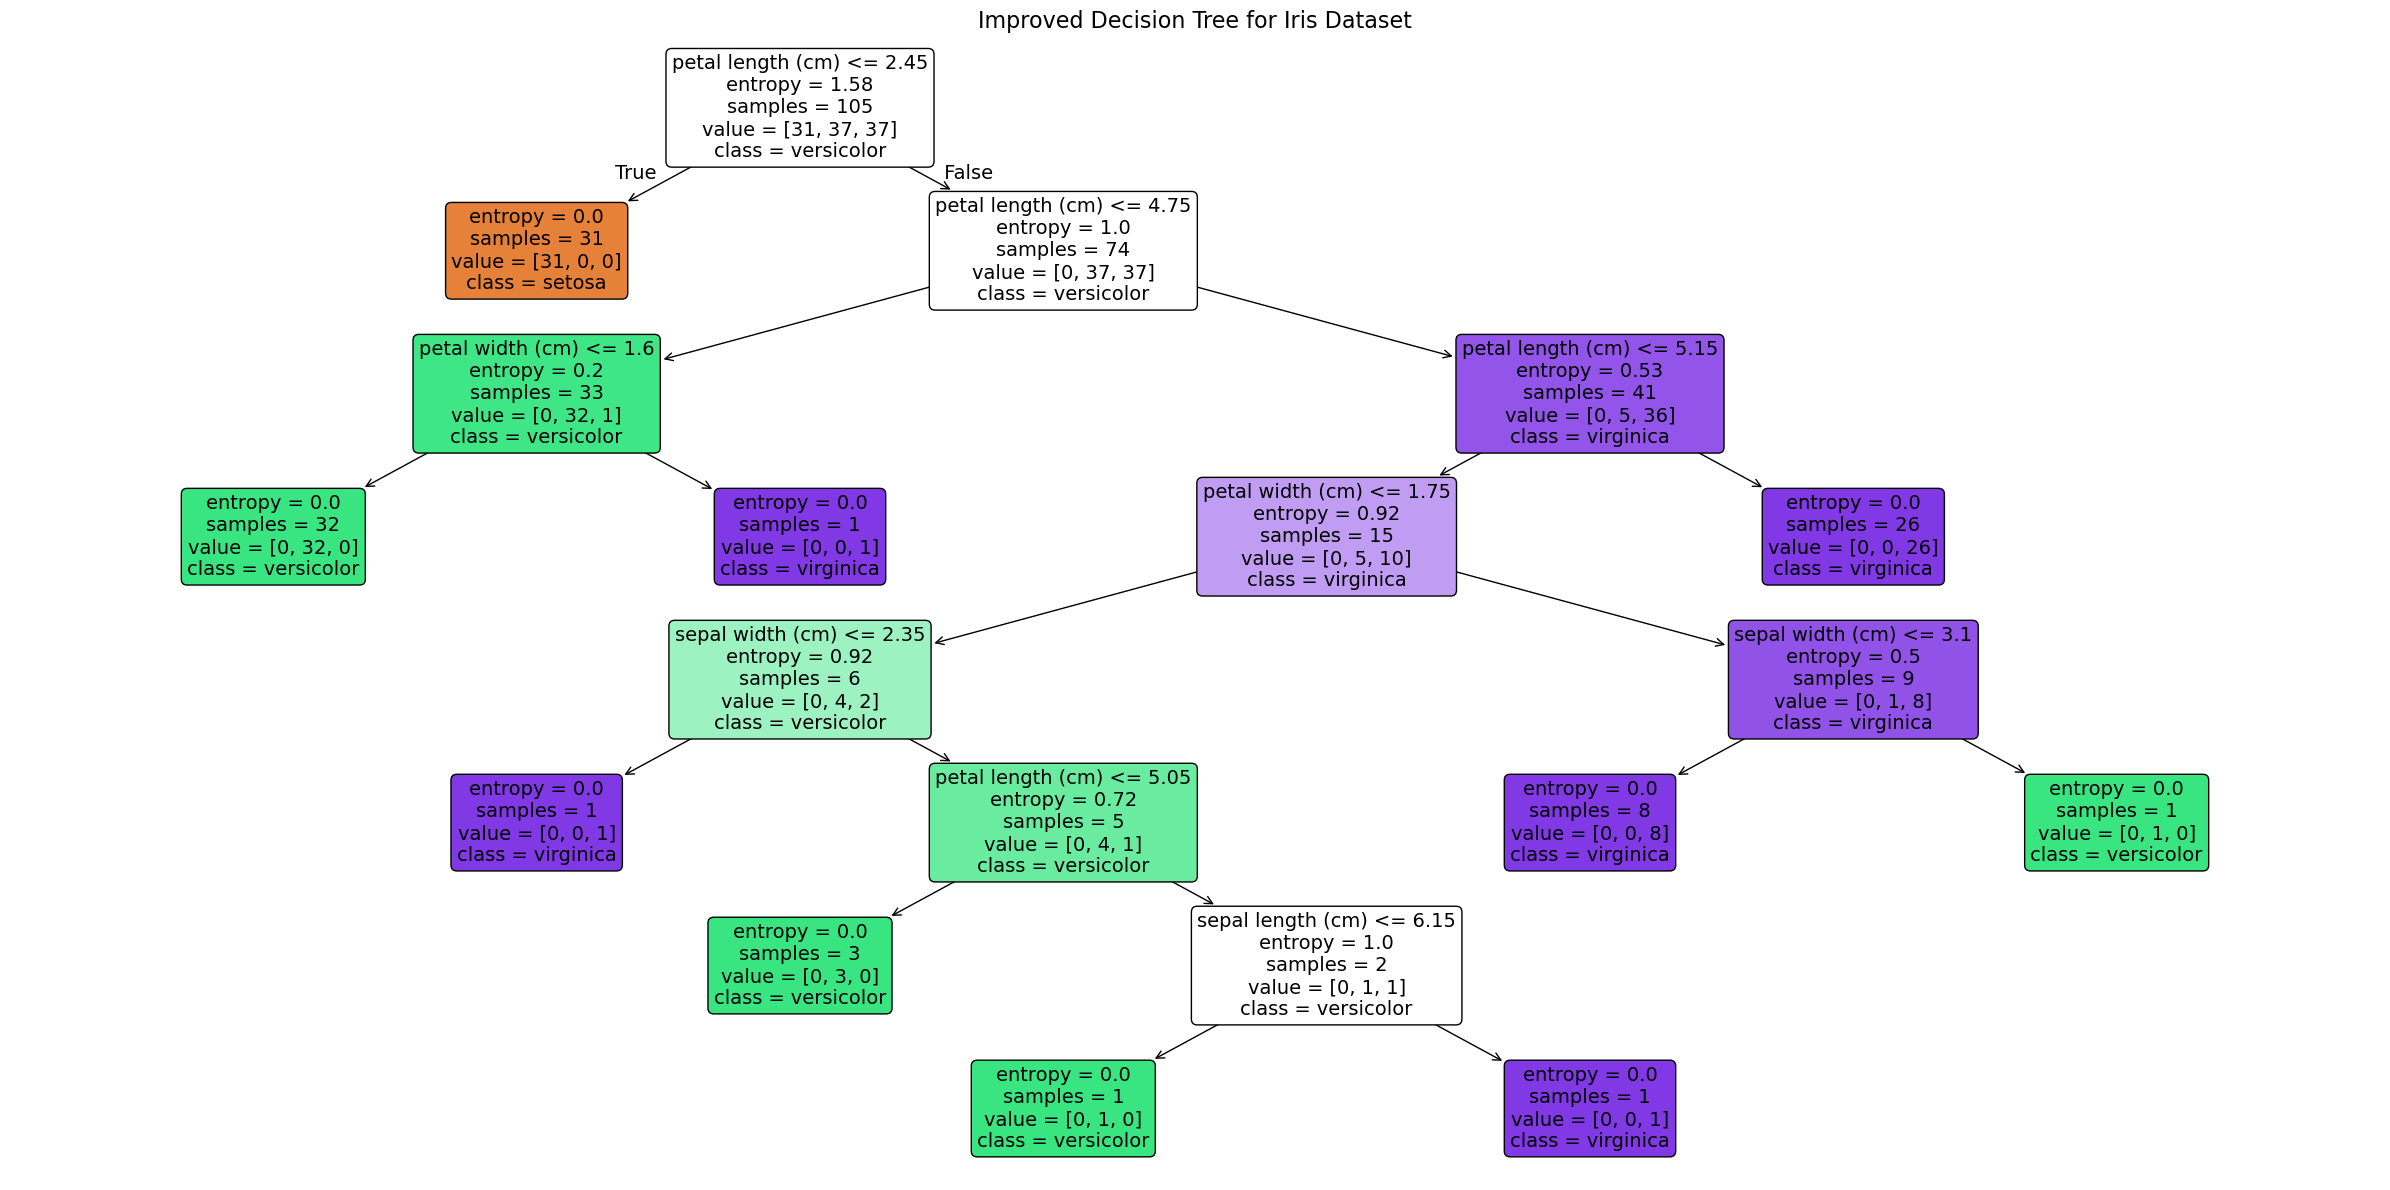

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(24, 12))  # Bigger plot size
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=14,
    impurity=True,      # Show entropy or Gini
    precision=2         # Show numbers with 2 decimal places
)
plt.title("Improved Decision Tree for Iris Dataset", fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
# Textual Representation of the Tree
tree_rules = export_text(clf, feature_names=iris.feature_names)
print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal length (cm) <= 5.15
|   |   |   |--- petal width (cm) <= 1.75
|   |   |   |   |--- sepal width (cm) <= 2.35
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  2.35
|   |   |   |   |   |--- petal length (cm) <= 5.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.05
|   |   |   |   |   |   |--- sepal length (cm) <= 6.15
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- sepal length (cm) >  6.15
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.75
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |